In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset generation
num_customers = 1000  

# Generate Customer IDs
customer_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

# Generate Customer Demographics
ages = np.random.randint(18, 80, size=num_customers)  
locations = np.random.choice(['Urban', 'Rural', 'Suburban'], size=num_customers, p=[0.5, 0.3, 0.2])
plan_types = np.random.choice(['Basic', 'Premium'], size=num_customers, p=[0.7, 0.3])

# Generate Usage Patterns
average_call_duration = np.random.uniform(1, 30, size=num_customers)  
data_usage = np.random.uniform(0.5, 50, size=num_customers)  
number_of_calls = np.random.randint(10, 300, size=num_customers)  

# Generate Billing Information
monthly_charges = np.random.uniform(20, 150, size=num_customers)  
payment_methods = np.random.choice(['CreditCard', 'BankTransfer'], size=num_customers, p=[0.6, 0.4])

# Generate Churn Status
churn_status = np.random.choice(['Yes', 'No'], size=num_customers, p=[0.2, 0.8])

# Create DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Location': locations,
    'PlanType': plan_types,
    'AverageCallDuration': average_call_duration,
    'DataUsage': data_usage,
    'NumberOfCalls': number_of_calls,
    'MonthlyCharges': monthly_charges,
    'PaymentMethod': payment_methods,
    'ChurnStatus': churn_status
})

# Save to CSV
data.to_csv('customer_churn_data.csv', index=False)

print("Dataset created and saved as 'customer_churn_data.csv'.")

Dataset created and saved as 'customer_churn_data.csv'.


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("customer_churn_data.csv")

# Display first 5 rows
data.head()

,CustomerID,Age,Location,PlanType,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges,PaymentMethod,ChurnStatus
0,C0001,56,Urban,Basic,26.289402,8.821847,135,69.987056,BankTransfer,No
1,C0002,69,Rural,Basic,16.289559,24.010073,235,65.104664,CreditCard,No
2,C0003,46,Urban,Basic,19.343779,3.233515,230,76.134922,BankTransfer,Yes
3,C0004,32,Suburban,Basic,19.689638,47.147981,220,121.631377,BankTransfer,No
4,C0005,60,Rural,Basic,24.774136,4.203650,34,82.942494,CreditCard,Yes


In [3]:
print(data.isnull().sum())

CustomerID             0
Age                    0
Location               0
PlanType               0
AverageCallDuration    0
DataUsage              0
NumberOfCalls          0
MonthlyCharges         0
PaymentMethod          0
ChurnStatus            0
dtype: int64


In [4]:
# Basic statistics for numerical columns
data.describe()

,Age,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,16.075521,24.501223,150.261000,84.296789
std,18.114267,8.236725,14.403498,83.508038,37.415142
min,18.000000,1.012841,0.509233,10.000000,20.509389
25%,35.000000,9.199405,11.979636,79.750000,51.639004
50%,50.000000,16.653440,23.997300,149.000000,83.955434
75%,66.000000,23.116538,37.070607,221.000000,115.935954
max,79.000000,29.986774,49.882330,299.000000,149.929889


In [6]:
!pip install seaborn

In [11]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 6.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 5.3 MB/s eta 0:00:0000:0100:01


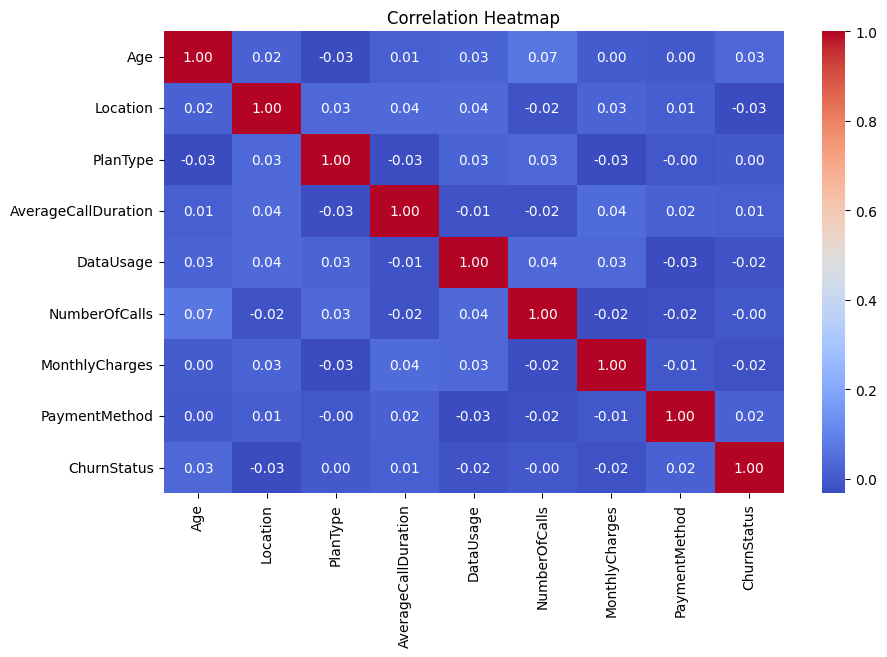

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("customer_churn_data.csv")

# Drop CustomerID (since it's not useful for analysis)
data.drop(columns=['CustomerID'], inplace=True)

# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['Location', 'PlanType', 'PaymentMethod', 'ChurnStatus']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Convert categorical values to numbers
    label_encoders[col] = le

# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data Visualization

We will now visualize the key patterns in customer churn using graphs.

📊 1. Churn Distribution

This shows how many customers have churned vs. stayed.

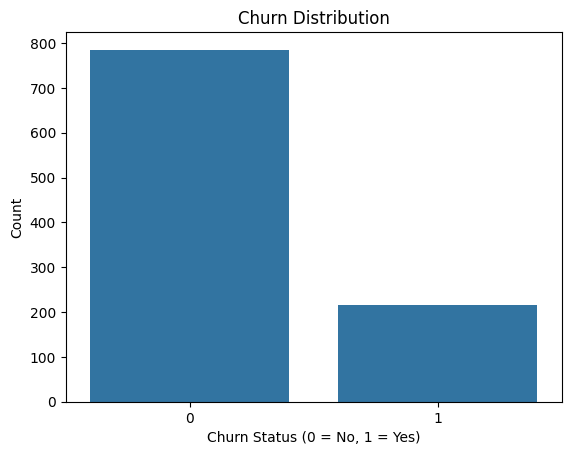

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="ChurnStatus", data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Plan Type vs. Churn

This helps see which plan type has higher ch

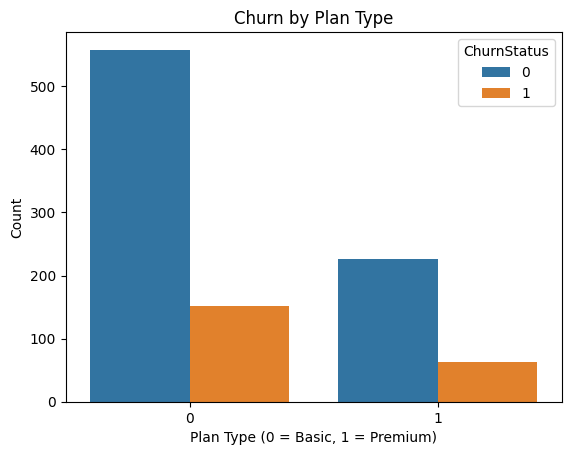

In [15]:
sns.countplot(x="PlanType", hue="ChurnStatus", data=data)
plt.title("Churn by Plan Type")
plt.xlabel("Plan Type (0 = Basic, 1 = Premium)")
plt.ylabel("Count")
plt.show()

 ## Monthly Charges vs. Churn

This shows if high bills cause churn.

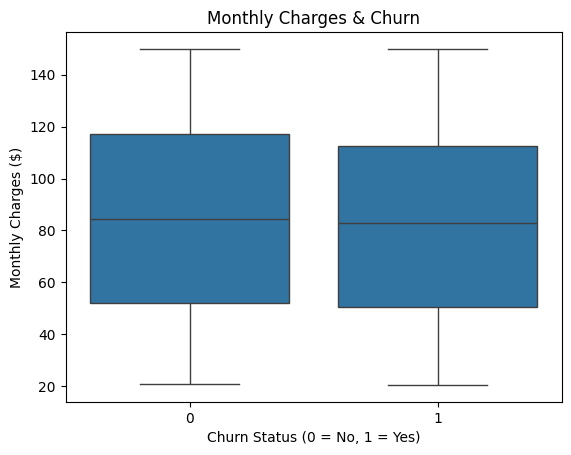

In [16]:
sns.boxplot(x="ChurnStatus", y="MonthlyCharges", data=data)
plt.title("Monthly Charges & Churn")
plt.xlabel("Churn Status (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges ($)")
plt.show()

## Predictive Modeling (Machine Learning)

Now, let’s train a Logistic Regression model to predict customer churn.

 1. Prepare the Data

We need to split the dataset into training and testing sets.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = data.drop(columns=['ChurnStatus'])  # Features
y = data['ChurnStatus']  # Target variable (0 = No, 1 = Yes)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict churn on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.78      0.68       200



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metr